<a href="https://colab.research.google.com/github/narayan-jat/Calculus/blob/main/Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is dedicated for implementation of various integration methods and plottings of their errors(error vs partition width) as partition width goes small and small. Integration methods are Riemann Integral, Sympson's integration and . These all are numerical methods used to approximate definite integral of a function.
#1. Sympson's integration: 
It is a numerical method used to approximate the definite integral of a function.This method is based on approximating the area under the curve of a function by dividing the area into a series of smaller sections, and approximating the area of each section using a quadratic function.Simpson's integration method is particularly effective when the function being integrated is relatively smooth and has few sharp changes in direction.The formula for Simpson's integration:
$$\int_{a}^{b}x dx = \frac{b - a}{6}( f(a) + f(b))$$
Where $f(x)$ is the function being integrated, $a$ and $b$ are the lower and upper limits of integration.

#2. Trapezoidal method of Integration.
It is a numerical integration technique that approximates the definite integral of a function by approximating the area under the curve using a trapezoidal shape.The idea behind the trapezoidal method is to divide the area under the curve of the function into trapezoids by drawing a series of vertical lines that divide the interval of integration into a series of subintervals. Each subinterval is approximated as a trapezoid with a base equal to the width of the subinterval and heights equal to the values of the function at the endpoints of the subinterval. The area of each trapezoid is then calculated, and the sum of the areas is taken as the approximation of the integral. Formula for the same is:
$$∫_{a}^{b}f(x)dx = \frac{b-a}{2}(f(b) + f(a))$$


#3. Riemann integration:
It is a method of approximating the definite integral of a function using a sum of rectangular areas.The Riemann integration method works by dividing the interval into a series of smaller subintervals, and approximating the area under the curve of the function using rectangles with heights equal to the function values at some point in each subinterval. The sum of these rectangular areas gives an approximation of the definite integral.The accuracy of the approximation can be improved by dividing the interval into more subintervals, which results in thinner rectangles and a better approximation of the curve. Formula:
$$\int_{a}^{b} xdx = \lim_{\Delta x → 0} \sum_{i = 1}^{n} f(x_i) Δx$$
Where $f(x_i)$ is the value of the function at the $i$-th subinterval, $Δx$ is the width of the subinterval, and the sum is taken over all subintervals from $i=1$ to $n$.

Consider the following function:
$$f(x) = x ^ 2 + 2x + 1$$

In [1]:
# Importing required modules.
from scipy.integrate import quad
import matplotlib.pyplot as py

In [ ]:
# Defining the function given for integration.
def f(x):
    return x ** 2 + 2 * x + 1
limit = [float(input('Enter the Lower limit: ')), float(input('Enter the Upper limit: '))]      # Integration limits.

In [3]:
# Calculating integration using python built-in module.
result, error = quad(f, limit[0], limit[1])

In [9]:
# Implementation of all types of methods of integration.
deltaXList = []                     # list of delata_x
interval = limit[1] - limit[0]
partition = 10
riemannInt = []
sympsonInt = []
trapezoidalInt = []
while partition < 10000:
    deltaX = interval / (partition)
    deltaXList.append(deltaX)
    tagPart = limit[0] + deltaX / 2         # Tagging of partitions.
    riemannSum = 0
    sympsonSum = 0
    trapezoidalSum = 0
    for i in range(partition):
        lowerLimit = limit[0] + i * deltaX
        u = lowerLimit + deltaX
        m = lowerLimit + u
        riemannSum = riemannSum + f(tagPart) * deltaX
        trapezoidalSum = trapezoidalSum + (f(lowerLimit) + f(u)) * deltaX / 2
        sympsonSum = sympsonSum + (f(lowerLimit) / 3 + f(m / 2) * (4 / 3) + f(u) / 3) * deltaX / 2
        tagPart += deltaX
    riemannInt.append(result - riemannSum)
    sympsonInt.append((sympsonSum - result))
    trapezoidalInt.append(trapezoidalSum - result)
    partition *= 2
print('actual', result)
print('reimann', riemannInt)
print('sympson', sympsonInt)
print('trapezoidal', trapezoidalInt)

actual 12.333333333333332
reimann [0.0008333333333290227, 0.00020833333334202564, 5.208333334039139e-05, 1.3020833279142607e-05, 3.2552082789294445e-06, 8.138022842274495e-07, 2.0345072293537214e-07, 5.086180188129674e-08, 1.2714831854054864e-08, 3.1822402490888635e-09]
sympson [0.0, 1.7763568394002505e-15, 1.7763568394002505e-15, 1.7763568394002505e-15, -3.552713678800501e-15, -5.329070518200751e-15, 5.329070518200751e-15, -2.3092638912203256e-14, -4.440892098500626e-14, 6.572520305780927e-14]
trapezoidal [0.0016666666666687036, 0.0004166666666662877, 0.00010416666666479557, 2.6041666670195696e-05, 6.5104166750984405e-06, 1.6276041776563943e-06, 4.069010408613849e-07, 1.0172524333995625e-07, 2.5431335259895604e-08, 6.357824489100494e-09]


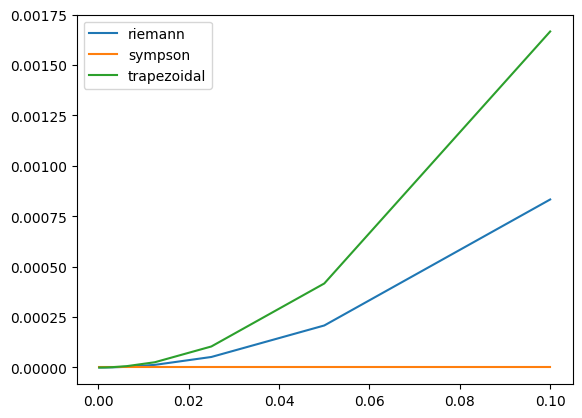

In [10]:
py.plot(deltaXList, riemannInt, label = 'riemann')
py.plot(deltaXList, sympsonInt, label = 'sympson')
py.plot(deltaXList, trapezoidalInt, label = 'trapezoidal')
py.legend()